Hisse senedi fiyatlarından iklim verilerine kadar, zaman serisi verileri birçok farklı alanda bulunur ve böyle verilerle etkili bir şekilde çalışabilmek, veri bilimciler için giderek daha önemli bir beceri haline gelmektedir. Bu doküman, sizi Python'da zaman serisi analizine tanıtacaktır. Bir zaman serisinin ne olduğunu öğrendikten sonra, otoregresif ve hareketli ortalama modellerinden eşbütünleşme modellerine kadar birçok zaman serisi modelini öğreneceksiniz. Bu süreçte, bu modelleri istatistik kütüphaneleri kullanarak nasıl tahmin edebileceğinizi, öngörebileceğinizi ve simüle edebileceğinizi öğreneceksiniz. Bu modellerin finans alanındaki uygulamalarına özellikle vurgu yaparak, bu modellerin nasıl kullanıldığına dair birçok örnek göreceksiniz.


 
* Trend: Bir şeydeki genel eğilim veya yönelim.
* Seasonality pattern: Belirli bir zaman diliminde tekrar eden düzen.
* Slice by year: Veriyi yıllara göre bölme.
* Sample, resample data: Veriyi belirli bir örnekle sınırlama veya veriyi farklı bir örnekleme sıklığına dönüştürme.
* Gradual decrease in something: Bir şeydeki aşamalı azalma veya düşüş.
* Spike: Ani ve belirgin bir yükselme veya artış.


------------------

## Korelasyon ve Otomatik Korelasyon
Bu bölümde, zaman serileri için korelasyon ve otomatik korelasyon kavramlarına tanıtılacaksınız. Korelasyon, iki zaman serisi arasındaki ilişkiyi açıklarken, otomatik korelasyon ise bir zaman serisinin geçmiş değerleriyle olan ilişkiyi açıklar.

### İki Zaman Serisinin Korelasyonu
İki zaman serisinin korelasyonu, bunların birbirleriyle nasıl değiştiğini ölçer. Korelasyon katsayısı, bu ilişkiyi tek bir sayıda özetler. Bir korelasyon değeri bir demektir ki, iki seri arasında sapma olmadan mükemmel bir lineer ilişki vardır. Yüksek korelasyonlar, iki serinin birlikte güçlü bir şekilde değiştiği anlamına gelir. Düşük bir korelasyon, birlikte değiştikleri anlamına gelir, ancak zayıf bir ilişki vardır. Yüksek negatif korelasyon ise iki serinin zıt yönlü bir şekilde değiştiği, ancak hala bir lineer ilişki içinde olduğu anlamına gelir.

İki eğilimli zaman serisinin korelasyonunu hesaplarken yaygın bir hata vardır. İki eğilimli zaman serisini düşünün. İki seri tamamen ilgisiz olsa bile, çok yüksek bir korelasyon elde edebilirsiniz. Bu nedenle, örneğin, iki hisse senedinin korelasyonuna baktığınızda, seviyelerine değil getirilerinin korelasyonuna bakmalısınız.

Aşağıdaki örnekte, iki seri, hisse senedi fiyatları ve UFO gözlemleri, zaman içinde yukarı doğru eğilim gösterir. Tabii ki, bu iki seri arasında bir ilişki yoktur, ancak korelasyon 0.94'tür. Ancak yüzde değişikliklerinin korelasyonunu hesaplarsanız, korelasyon yaklaşık olarak sıfıra düşer

In [26]:
## Gerekli kütüphanelerin import işlemi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("Datasets/diet.csv",index_col="Date") # indis veri seti içerisindeki Date sütunu olacak
df.head()

,diet
Date,
6/26/2011,70
7/3/2011,71
7/10/2011,73
7/17/2011,74
7/24/2011,72


In [28]:
df.index = pd.to_datetime(df.index) # indisin tipini tarih zamana çevirme

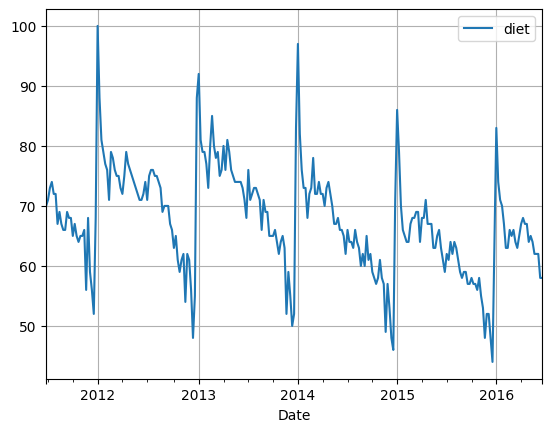

In [29]:
# grip sayesinde verilerin gözlemlenebilmesi
df.plot(grid=True)
plt.show()

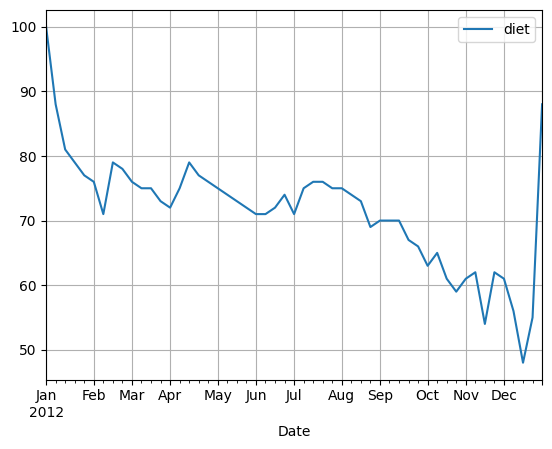

In [30]:
df2012 = df.loc['2012']
df2012.plot(grid=True)
plt.show()

## Farklı zaman serilerini birleştirmek
Aşağıdaki örnekte farklı zamanlarda kapanışı (bazı tatil günlerinde piyasanın birisi açık) yapılan piyasa verileri üzerinden veri birleştirme işlemi gerçekleştirilmiştir. 
Bu işlem sırasında pandas kütüphanesinden `.join()` fonksiyonu kullanılmıştır. İki piyasanında açık olduğu zamanların verileri bir araya getirilmektedir. 

In [31]:
stocks = pd.read_csv("Datasets/EDA/stocks.csv",index_col="observation_date",parse_dates=True)
stocks.index

DatetimeIndex(['2007-06-11', '2007-06-12', '2007-06-13', '2007-06-14',
               '2007-06-15', '2007-06-18', '2007-06-19', '2007-06-20',
               '2007-06-21', '2007-06-22',
               ...
               '2017-05-26', '2017-05-30', '2017-05-31', '2017-06-01',
               '2017-06-02', '2017-06-05', '2017-06-06', '2017-06-07',
               '2017-06-08', '2017-06-09'],
              dtype='datetime64[ns]', name='observation_date', length=2519, freq=None)

In [32]:
bonds =  pd.read_csv("Datasets/bonds.csv",index_col="observation_date",parse_dates=True)
bonds.index

DatetimeIndex(['2007-06-08', '2007-06-11', '2007-06-12', '2007-06-13',
               '2007-06-14', '2007-06-15', '2007-06-18', '2007-06-19',
               '2007-06-20', '2007-06-21',
               ...
               '2017-05-25', '2017-05-26', '2017-05-30', '2017-05-31',
               '2017-06-01', '2017-06-02', '2017-06-05', '2017-06-06',
               '2017-06-07', '2017-06-08'],
              dtype='datetime64[ns]', name='observation_date', length=2503, freq=None)

In [33]:
# iki veri setinden farklı tarihleri çıkaralım
set_stock_dates = set(stocks.index)
set_bonds_dates = set(bonds.index)
print(*set_bonds_dates.symmetric_difference(set_stock_dates),sep="\n")

2010-11-11 00:00:00
2009-10-12 00:00:00
2011-10-10 00:00:00
2012-10-29 00:00:00
2007-11-12 00:00:00
2016-10-10 00:00:00
2010-10-11 00:00:00
2012-04-06 00:00:00
2007-10-08 00:00:00
2017-06-09 00:00:00
2007-06-08 00:00:00
2015-11-11 00:00:00
2015-10-12 00:00:00
2009-11-11 00:00:00
2014-10-13 00:00:00
2011-11-11 00:00:00
2013-11-11 00:00:00
2008-11-11 00:00:00
2016-11-11 00:00:00
2012-11-12 00:00:00
2015-04-03 00:00:00
2012-10-08 00:00:00
2014-11-11 00:00:00
2013-10-14 00:00:00
2008-10-13 00:00:00
2010-04-02 00:00:00


In [34]:
# iki veri setini ortak tarihlere göre birleştirelim
stocks_ve_bonds = stocks.join(bonds,how='inner')
stocks_ve_bonds

,SP500,US10Y
observation_date,,
2007-06-11,1509.12,5.14
2007-06-12,1493.00,5.26
2007-06-13,1515.67,5.20
2007-06-14,1522.97,5.23
2007-06-15,1532.91,5.16
...,...,...
2017-06-02,2439.07,2.15
2017-06-05,2436.10,2.18
2017-06-06,2429.33,2.14


-------------------------------
## iki veri seti arasındaki korelasyonu bulmak

Bu örnekte yatırımcıların genellikle varlık tahsisi ve riskten korunma amacıyla iki farklı varlığın getirileri arasındaki korelasyonla ilgilendiği düşünülerek yukarıdaki iki farklı piyasa verisinin pozitif ya da negatif korelasyona sahip olduğu sorusu yanıtlanmaktadır. Bu aşamada verinin görselleştirilmesi durum tespiti için yine önemlidir.


In [35]:
# yüzdelik değişimin hesaplanması
getiriler = stocks_ve_bonds.pct_change()
getiriler.head()

,SP500,US10Y
observation_date,,
2007-06-11,NaN,NaN
2007-06-12,-0.010682,0.023346
2007-06-13,0.015184,-0.011407
2007-06-14,0.004816,0.005769
2007-06-15,0.006527,-0.013384


In [36]:
# korelasyonun hesaplanması
korelasyon = getiriler.SP500.corr(getiriler.US10Y)
print("Veriler arasındaki korelasyon:",korelasyon)

Veriler arasındaki korelasyon: 0.4119448886249272


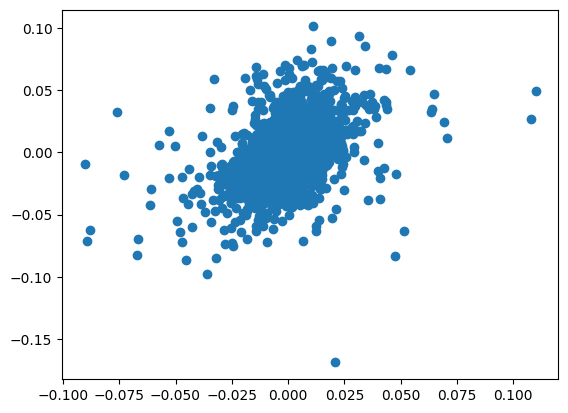

In [37]:
plt.scatter(getiriler.SP500,getiriler.US10Y)
plt.show()

Yukarıdaki örnekte elde edilen pozitif korelasyon iki verininde uyumlu bir şekilde hareket ettiğini göstermektedir. 

Not: Faiz oranları ile Hisse Senetleri


## Sahte korelasyon
iki trendin birbirinden alakasız konularda olması ve  birbiriyle güçlü korelasyona sahip olması durumuna ***sahte korelasyon(spurios correlation)*** denir. Örneğin iki hisse senedinin korelasyonuna bakılırken *seviyelerine değil, getirilerinin korelasyonuna bakılmalıdır*

Bu noktada örnek olarak piyasa verisi ile UFO verilerinin arasındaki korelasyonu hesaplayalım. Her ikisininde yükseliş trendinde olduğunu görebiliriz



In [38]:
df = pd.read_csv("Datasets/levels.csv",index_col='Date',parse_dates=True)
df.head()

,DJI,UFO
Date,,
1941-01-01,110.96,1
1942-01-01,119.40,2
1943-01-01,135.89,9
1944-01-01,152.32,9
1945-01-01,192.91,9


In [39]:
# korelasyonun hesaplanması
levels = df.copy()
correlation1 = levels['DJI'].corr(levels['UFO'])
print("korelasyon:",correlation1)

korelasyon: 0.9399762210726432


In [40]:
# Yüzdelik değişimler arasındaki korelasyonu hesaplayalım
changes = levels.pct_change()
changes

,DJI,UFO
Date,,
1941-01-01,NaN,NaN
1942-01-01,0.076063,1.000000
1943-01-01,0.138107,3.500000
1944-01-01,0.120907,0.000000
1945-01-01,0.266478,0.000000
...,...,...
2009-01-01,0.188194,-0.057884
2010-01-01,0.110228,-0.056816
2011-01-01,0.055284,0.192389


In [41]:
correlation2 = changes['DJI'].corr(changes['UFO'])
print("korelasyon:",correlation2)

korelasyon: 0.06026935462405376


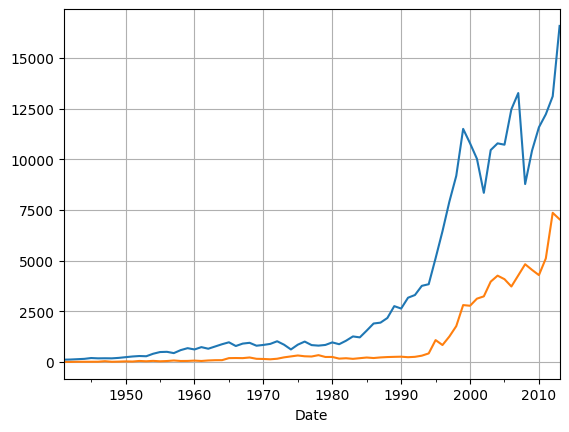

In [42]:
df['DJI'].plot(grid=True)
df['UFO'].plot(grid=True)
plt.show()

## Regresyon

Zaman serileri için basit bir doğrusal regresyon, bağımlı bir değişken y ve bağımsız bir değişken x arasında en iyi uyan çizginin eğimi beta ve yatay ekseni kestiği nokta alpha'yı bulur. x'ler ve y'ler iki zaman serisi olabilir.

Regresyon teknikleri çok yaygındır, bu nedenle Python'da bunları kullanmak için birçok paket bulunmaktadır. Statsmodels'de OLS bulunmaktadır. Numpy'de polyfit bulunmaktadır ve degree'yi 1 olarak ayarlarsanız, veriyi bir çizgiye uydurur, ki bu da bir doğrusal regresyondur. Pandas'ın bir ols yöntemi vardır ve scipy'nin bir doğrusal regresyon fonksiyonu bulunmaktadır. X ve Y'nin sırasının paketler arasında tutarlı olmadığına dikkat edin.

Aşağıdaki örnekte, petrol fiyatlarının değerlerini bağımsız bir değişken olarak sp500'ü kullanarak regretleyeceğiz. Bağımlı, sağ taraftaki bir değişken olarak bir sütun eklemeniz gerekiyor. Bunu yapmanızın nedeni, regresyon fonksiyonunun sabit bir sütun olmadığını varsaymasıdır, bu durumda regresyonu bir kesişme olmadan çalıştırmak istediğinizi düşünür. Bir sütun ekleyerek, statsmodels sabit sütunun regresyon katsayısını da hesaplayacaktır ki bu da çizginin kesişme noktası olarak yorumlanabilir. Statsmodels'ın "add_constant" yöntemi, bir sabit eklemenin basit bir yoludur.


In [43]:
# statsmodels modülünü içe aktar
import statsmodels.api as sm

# x ve y'nin korelasyonunu hesapla

data = pd.read_csv('Datasets/asset_classes.csv', parse_dates=['DATE'], index_col='DATE')
data = data.dropna()
x = data['SP500']
y = data['Oil']

korelasyon = x.corr(y)
print("x ile y arasındaki korelasyon %4.2f" %(korelasyon))

# Seriyi DataFrame'e dönüştür ve sütunu 'x' olarak adlandır
dfx = pd.DataFrame(x.values, columns=['x'])

# DataFrame dfx'e bir sabit ekleyin
dfx1 = sm.add_constant(dfx)

# y'yi dfx1 üzerine regresyon yapın
sonuc = sm.OLS(y.values, dfx1).fit()

# Sonuçları yazdır ve R-kare ile yukarıdaki korelasyon arasındaki ilişkiye bakın
print(sonuc.summary())

x ile y arasındaki korelasyon -0.35
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     336.5
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.44e-70
Time:                        08:38:31   Log-Likelihood:                -11214.
No. Observations:                2469   AIC:                         2.243e+04
Df Residuals:                    2467   BIC:                         2.244e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        108

Katsayı, regresyon analizinin eğimini ve kesim noktasını içerir. İki değişken negatif bir korelasyona sahip olduğundan eğim negatiftir. Dikkat edilmesi gereken ikinci önemli istatistik R-Kare'dir, bu değer 0.12'dir. R-Kare, doğrusal regresyon çizgisinin verilere ne kadar iyi uydurulduğunu ölçer. Korelasyon ile R-Kare arasında bir ilişki vardır. Korelasyonun büyüklüğü, R-Kare'nin kareköküdür. Korelasyonun işareti ise regresyon çizgisinin eğiminin işaretidir.

## Autocorrelation

Oto-korelasyon, bir zaman serisinin kendisiyle gecikmiş bir kopyasının korelasyonudur. Aynı zamanda seri korelasyonu olarak da adlandırılır. Genellikle bir serinin oto-korelasyonundan bahsettiğimizde, genellikle "günlük bir gecikme" oto-korelasyonunu anlarız. Örneğin günlük veri kullanıyorsak, oto-korelasyon, serinin bir gün gecikmiş hali ile olan korelasyonunu ifade eder.

Pozitif oto-korelasyon, aynı zamansal aralıktaki gözlemlenen artışın gecikmiş zaman aralığında orantılı bir artışa yol açtığı anlamına gelir ve genellikle 'trend takibi' olarak bilinir. Negatif oto-korelasyon ise 'ortalama geri dönme' olarak bilinen, belirli bir değerin ortalamanın üzerinde olması durumunda bir sonraki değerin (veya önceki değerin) muhtemelen ortalamanın altında olma eğiliminde olduğu anlamına gelir. Aşağıdaki şekil, her ikisini de içeren bir örneği göstermektedir.

Zaman serisinin otokorelasyonu birçok gerçek dünya uygulamasına sahiptir. Birçok hedge fon stratejisi, ortalama dönüş ve momentum stratejilerinin biraz daha karmaşık versiyonlarıdır. Çünkü hisse senetleri tarih boyunca yaklaşık bir haftalık süre zarfında negatif otokorelasyona sahiptir, bu nedenle popüler bir strateji, son bir hafta içinde değeri düşen hisse senetlerini almak ve değeri artan hisse senetlerini satmaktır. Diğer varlık sınıfları için, örneğin emtia ve para birimleri, tarih boyunca birkaç ay süreyle pozitif otokorelasyona sahip olmuşlardır. Bu nedenle, tipik bir hedge fon stratejisi, son birkaç ay içinde değeri artan emtiaları almak ve değeri düşen emtiaları satmaktır

Otomatik korelasyon fonksiyonu (ACF), gecikmeye bağlı olarak otomatik korelasyonu ifade eder. Anlamlı olmayan sıfırdan farklı otomatik korelasyonlar, serinin geçmişten tahmin edilebileceğini ima eder. Gelecekteki değerleri tahmin etmek için hangi değerlere güvenebileceğinizi belirleyebilir, otokorelasyon fonksiyonunu bu mevsimlerde gözlemleyerek mevsimsel kazançları keşfedebilir ve veriyi uygun bir model seçmek için kullanabilirsiniz.

plot_acf, otomatik korelasyon fonksiyonunu çizmek için kullanılan statsmodels fonksiyonudur. Giriş x bir dizi veya dizi olmalıdır. lags argümanı, kaç gecikmenin otomatik korelasyon fonksiyonunun çizileceğini belirtir. alpha argümanı, güven aralığının genişliğini ayarlar. Örneğin, eğer alpha 0.05 ise, bu, belirli bir gecikmedeki gerçek otomatik korelasyonun sıfır olduğu durumda, örnek otomatik korelasyonunun bu pencerenin dışına düşme olasılığının yalnızca %5 olduğu anlamına gelir. Alpha'yı daha düşük ayarlarsanız veya daha az gözleminiz varsa daha geniş bir güven aralığı elde edersiniz

[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259 ]


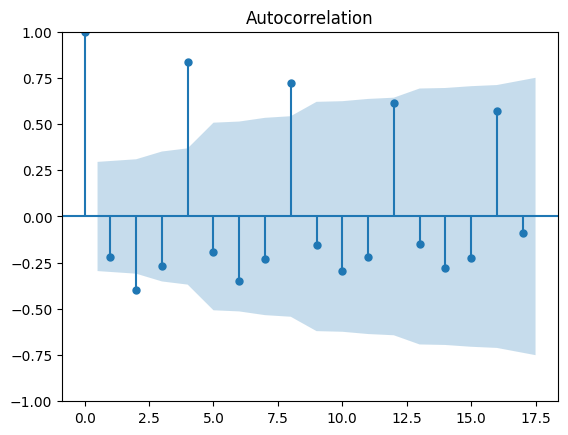

In [44]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

HRB = pd.read_csv('Datasets/HRB.csv', parse_dates=['Quarter'], index_col='Quarter')
# Compute the acf array of HRB
acf_array = acf(HRB)
print(acf_array)

# Plot the acf function
plot_acf(HRB, alpha=0.05)
plt.show()

# Zaman Serisi Modelleri
* White Noise Function
* Random Walk
* Stationary


## White Noise Func
Beyaz gürültü zaman serisi, aynı şekilde dağıtılmış, ilişkisiz rastgele değişkenlerin bir dizisidir. Hisse senedi getirileri genellikle beyaz gürültü olarak modellenir. Ne yazık ki, beyaz gürültü için geçmişe dayalı olarak gelecekteki gözlemleri tahmin edemeyiz; tüm gecikmelerdeki otokorelasyonlar sıfırdır.


Aşağıdaki örnekte iadelerle ilgili olarak bir beyaz gürültü serisi oluşturulmuş ve otokorelasyon fonksiyonunu tüm gecikmeler için sıfır olduğunu gösterecek şekilde çizilmiştir. Rastgele getiriler oluşturmak için `np.random.normal()` komutunu kullanılmaktadır. 

Nasıl göründüğünü görebilmek adına beyaz gürültü ve otokorelasyon fonksiyonunun grafiğini çizelim

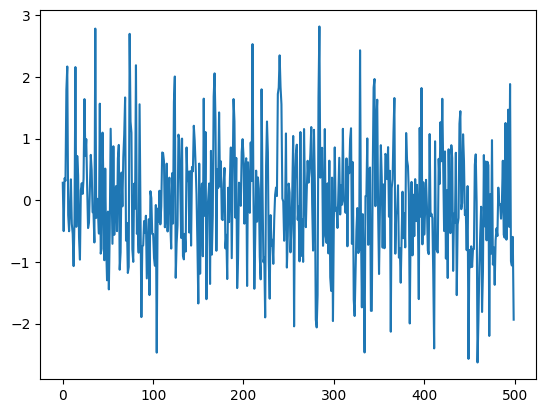

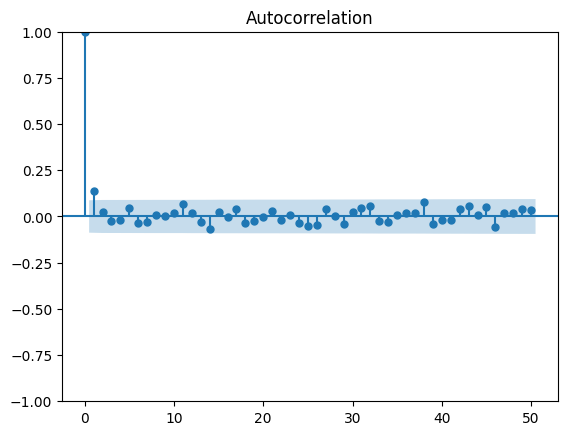

In [45]:
import numpy as np
noise = np.random.normal(loc=0, scale=1, size=500)
plt.plot(noise)
plt.show()
plot_acf(noise, lags=50)
plt.show()

## Random Walk
random walk, bugünkü fiyat, dünkü fiyata White Noise eklenmiş haliyle aynıdır.

P(t) = P(t-1) + White Noise

Bu nedenle fiyatın değişimi beyaz gürültüdür. Beyaz gürültüyü önceden tahmin edemeyeceğimizden, bugünkü fiyat için en iyi tahmin dünkü fiyat olacaktır.

Bir zaman serisinin rassal yürüyüşü takip edip etmediğini test etmek için, mevcut değeri (örneğin fiyat) gecikmiş değerlerle regresyon yapabiliriz. Eğer eğim katsayısı belirgin bir şekilde bir değerden küçükse, null hipotezi reddedilebilir (seri rassal yürüyüşü takip etmez). Eğer eğim katsayısı bir'e çok benzemiyorsa, null hipotezi reddedilemez.

Bunu yapmanın başka bir yolu, değerlerin farkını gecikmiş değerler üzerine regresyon yapmak ve eğim katsayısını bir yerine sıfır olup olmadığını test etmektir. Bu, Dickey-Fuller testi olarak bilinir ve daha fazla gecikmiş değer eklenirse Augmented Dickey-Fuller (ADF) testi olarak adlandırılır.


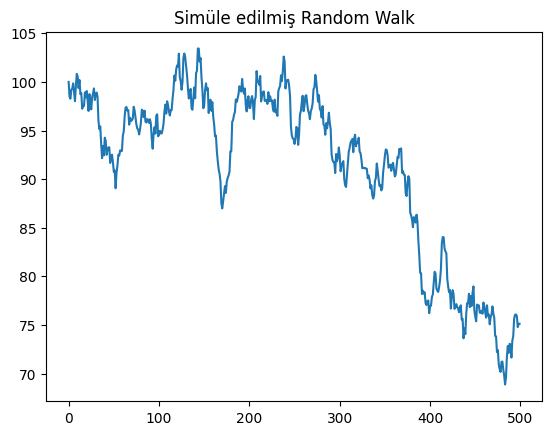

In [46]:
# Ortalaması 0 standart sapması 1 olan 500 rastgele adım üretildi
steps = np.random.normal(loc=0, scale=1, size=500)

# ilk eleman 0 olarak ayarlandı
steps[0]=0

# Başlangıç fiyatı 100 olacak şekilde hisse senedi fiyatları simüle edildi
P = 100 + np.cumsum(steps)

# Simüle edilen fiyatların görselleştirilmesi 
plt.plot(P)
plt.title("Simüle edilmiş Random Walk")
plt.show();

Yukarıdaki çalışmayı genişletmek adına iki adım atalım
* Random walk başlatıp sonrasında hisse senedi fiyatları gibi çoğu zaman serisi random walk şeklindedir ancak zamanla yükselme eğilimindedir. 
* Son uygulamada, random walk taki gürültü ilave nitelikteydi: fiyattaki rastgele, normal değişiklikler son fiyata eklendi. Ancak gürültü eklediğinizde teorik olarak negatif fiyatlar alınabilir. Şimdi gürültüyü çarpımsal hale getirilmiştir: Toplam getiri elde etmek için rastgele, normal değişikliklere bir tane ekleyerek ve bu son fiyatla çarpılmıştır.

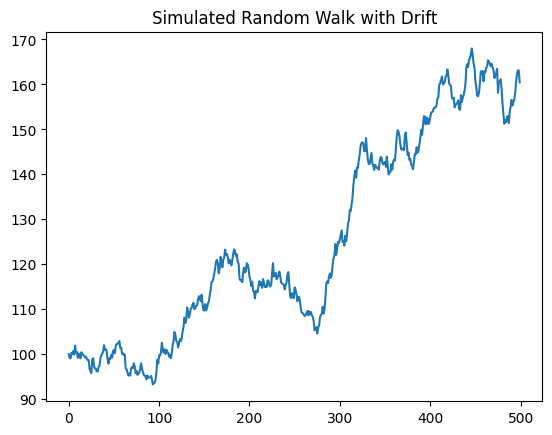

In [47]:
# 500 rastgele adım üretilmesi
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1

# ilk adımın 1 olarak belirlenmesi 
steps[0]=1

# Kümülatif değerler üzerinde hisse senedi fiyatının simüle edilmesi
P = 100 * np.cumprod(steps)

# Verilerin görselleştirilmesi
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show();

## Dickey Fuller Testi
Aşağıdaki örnekte kaydedilmiş, bir hisse senedi fiyatlarının zaman serisine bakılacaktır. statsmodels kütüphanesinden 'Augmented Dicket-Fuller Test' kullanılarak rastgele yürüyüşün birim kök içerip içermediğini test edilmektedir. 

ADF testi sayesinde "sıfır hipotezi" serinin rastgele bir yüyüş takip ettiği yönündedir. Bu nedenle düşük bir p değeri serinin bir random walk olduğu yönündeki null hipotezini reddebileceğimiz anlamına gelmektedir. 


In [48]:
df = pd.read_csv("Datasets/AMZN.csv",parse_dates=True,index_col='Date')
df

,Adj Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083
...,...
2017-07-27,1046.000000
2017-07-28,1020.039978
2017-07-31,987.780029


In [49]:
# kütüphanelerin import edilmesi
from statsmodels.tsa.stattools import adfuller

# adf testinin koşulması ve sonuçların yazıdırılması
sonuclar = adfuller(df['Adj Close'])
print(sonuclar)

# p  değeri
print("p test değeri:" + str(sonuclar[1]))

(4.025168525770743, 1.0, 33, 5054, {'1%': -3.4316445438146865, '5%': -2.862112049726916, '10%': -2.5670745025321304}, 30308.64216426981)
p test değeri:1.0


Bu teste göre fiyatların  rastgele bir yürüyüş izlediği hipotezini reddedemeyiz. Bir sonraki alıştırmada getirilere bakılması için yüzdelik değişimin elde edilmesi random walk olmadığı görülmektedir.


In [50]:
# kütüphanelerin import edilmesi
from statsmodels.tsa.stattools import adfuller

# Yüzdelik değişimlerin elde edilmesi
df_getiri = df.pct_change()

# Boş verilerin temizlenmesi
df_getiri = df_getiri.dropna()

# P değerinin elde edilmesi ve yazdırılması
sonuclar = adfuller(df_getiri['Adj Close'])
print('P Değeri: ' + str(sonuclar[1]))

P Değeri: 2.5655898083474214e-22


P değeri son derece küçüktür, dolayısıyla getirilerin tüm anlamlılık düzeylerinde rastgele bir yürüyüş olduğu hipotezini kolaylıkla reddedebiliriz.

## Stationary Durağanlık
Stationer (sabit) sinyaller, ortak dağılımlarının zamanla değişmediği sinyallerdir. Daha pratik bir tanım, sinyalin ortalamasının, varyansının ve otokorelasyonunun zamanla değişmediği zayıf sabit tanımıdır.

Sabitlik, zaman serisi analizi ve tahmininde çok önemli bir kavramdır. Bunun nedeni, eğer seri sabit değilse, onu modelleme ve tahmin edemeyiz. Modelleme adımının temel görevi, tahmin gibi gerekli görevler için kullanılabilecek bir dizi parametreyi tahmin etmektir. Eğer seri sabit değilse, parametreleri zaman içinde değişecektir, bu nedenle onu modelleyemezsiniz. Rastgele yürüyüş, yaygın bir sabit olmayan seri türüdür. Varyans zamanla artar. Örneğin, eğer hisse senedi fiyatları rastgele yürüyüşse, o zaman yarınki fiyatlarla ilgili belirsizlik, 10 yıl sonra ki belirsizlikten çok daha azdır. Mevsimsel seriler de ayrıca sabit değildir.

Birçok sabit olmayan seri, basit bir dönüşümle sabit hale getirilebilir. Rastgele Yürüyüş, sabit olmayan bir seridir, ancak ilk farkları alındığında, yeni seri Beyaz Gürültü olur, yani sabittir.

Örneğin, H&R Block'un üç aylık kazançları için aşağıdaki örnekte büyük bir mevsimsel bileşen bulunmaktadır ve bu nedenle durağan değildir. Eğer mevsimsel farkı alırsak, yani 4 gecikmeli bir fark alırsak, dönüştürülmüş seri durağan görünür.


Text(0.5, 1.0, 'H&R Block için Üç Aylık Kazançlar Mevsimsel Farkı')

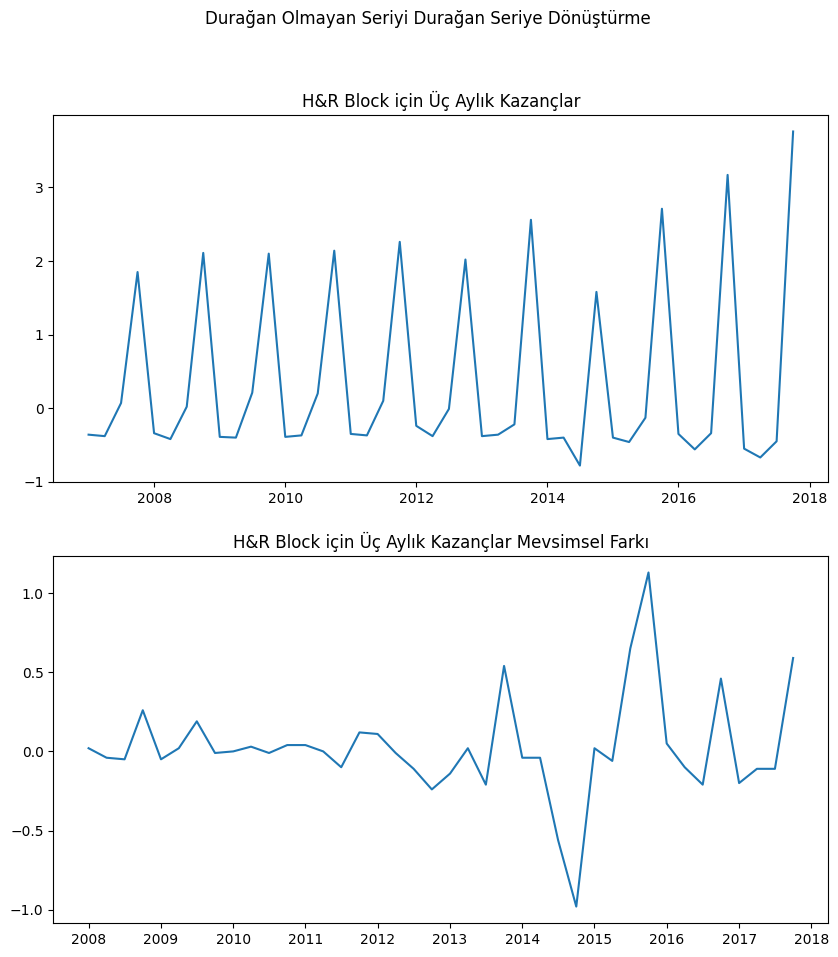

In [51]:
HRB = pd.read_csv('Datasets/HRB.csv', parse_dates=['Quarter'], index_col='Quarter')
# Durağan Olmayan Seriyi Durağan Seriye Dönüştürme
fig, axs = plt.subplots(2)
fig.suptitle('Durağan Olmayan Seriyi Durağan Seriye Dönüştürme')
fig.set_size_inches(10, 10.5)

axs[0].plot(HRB)
axs[0].set_title('H&R Block için Üç Aylık Kazançlar')

axs[1].plot(HRB.diff(4))
axs[1].set_title('H&R Block için Üç Aylık Kazançlar Mevsimsel Farkı')

Son örnek Amazon'ın üç aylık geliriyle ilgilidir. Bu gelir hem üstel bir şekilde artmakta hem de güçlü bir mevsimsel deseni göstermektedir. İlk olarak, serinin üstel büyümesini ortadan kaldırmak için serinin sadece logaritmasını alacağız. Ancak serinin hem logaritmasını alıp hem de mevsimsel farkını aldığınızda, dönüştürülmüş seri durağan görünmektedir.

Text(0.5, 1.0, "Amazon'un üç aylık gelirinin logaritmasının mevsimsel farkı")

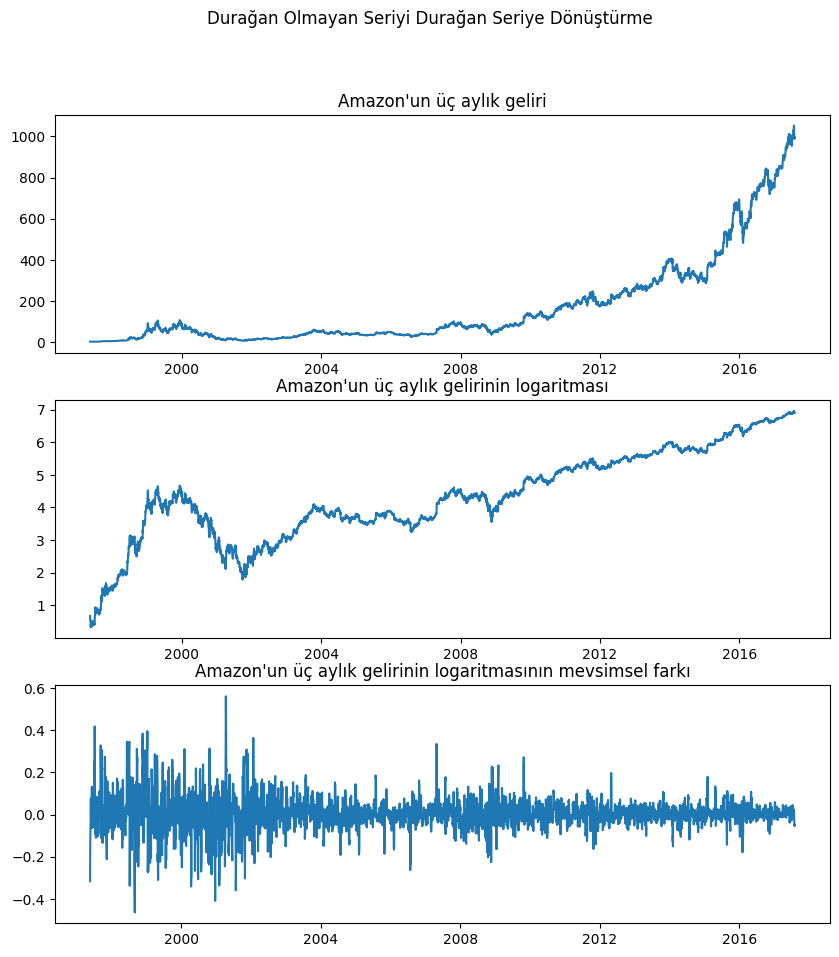

In [52]:
AMZN =  pd.read_csv('Datasets/AMZN.csv', parse_dates=['Date'], index_col='Date')

fig, axs = plt.subplots(3)
fig.suptitle('Durağan Olmayan Seriyi Durağan Seriye Dönüştürme')
fig.set_size_inches(10, 10.5)

axs[0].plot(AMZN)
axs[0].set_title("Amazon'un üç aylık geliri")
axs[1].plot(np.log(AMZN))
axs[1].set_title("Amazon'un üç aylık gelirinin logaritması")

axs[2].plot(np.log(AMZN).diff(4))
axs[2].set_title("Amazon'un üç aylık gelirinin logaritmasının mevsimsel farkı")


# AR Models 
Bu bölümde, zaman serileri için otoregresif veya AR modellerini açıklayacağız. Bu modeller, serinin geçmiş değerlerini kullanarak mevcut değeri tahmin etmek için kullanılır.


Otokorelasyonlu (AR) model, geçmiş davranışa dayanarak gelecekteki davranışı tahmin eder. Zaman serisi değerleri ile bunları takip eden ve önceleyen değerler arasında bir korelasyon olduğunda tahmin yapmak için kullanılır.

AR modelinde, bugünkü değer aşağıdaki denklemde gösterildiği gibi dünkü değerin bir kesiri (phi) ile gürültü ve ortalama eklenmiş halidir:

R(t) = ortalama + phi*R(t-1) + noise.

Bir önceki adımda sadece bir önceki zaman adımına baktığımızdan, bu AR(1) modelidir. Model, daha fazla gecikmiş değer ve daha fazla phi parametresi içerecek şekilde genişletilebilir. Burada AR(1), AR(2) ve AR(3) modellerini gösteriyoruz.

Eğer phi bir'e eşitse, serisi önceki bölümde tartışıldığı gibi rastgele bir yürüyüşü temsil eder ve eğer sıfırsa bu beyaz gürültü olacaktır. Sürecin istikrarlı ve durağan olması için, phi'nin -1 ile +1 arasında olması gerekir. Eğer phi negatif bir değere sahipse, o zaman zaman t-1'de pozitif bir getiri, bu dönemin getirisinin daha olası bir şekilde negatif olması anlamına gelir. Bunu 1.3 bölümünde ortalama geri dönüş olarak adlandırdık. Eğer phi pozitif bir değere sahipse, o zaman zaman t-1'de pozitif bir getiri, bu dönemin getirisinin pozitif olması beklenir. 

Aşağıdaki örnek, farklı phi değerlerine sahip dört simüle edilmiş zaman serisini göstermektedir (0.9, -0.9, 0.5, -0.5):

Text(0.5, 1.0, 'Phi = -0.5 olan Simülasyon Verileri ')

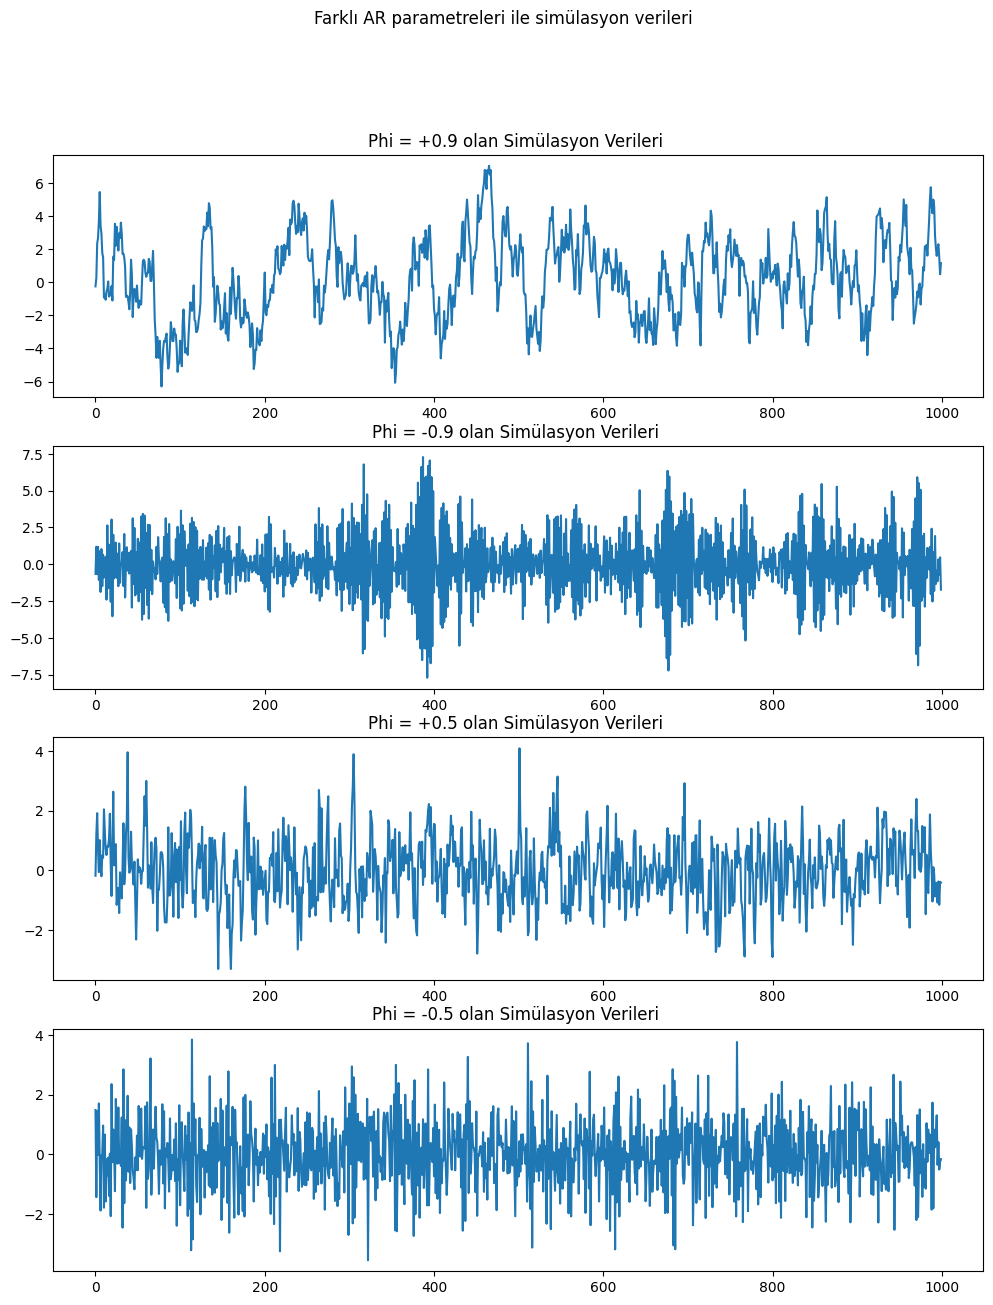

In [53]:
# Simülasyon verilerini oluşturmak için modülü içe aktar
from statsmodels.tsa.arima_process import ArmaProcess

fig, axs = plt.subplots(4)
fig.set_size_inches(12, 14.5)
fig.suptitle('Farklı AR parametreleri ile simülasyon verileri')

# Grafik 1: AR parametresi = +0.9
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
axs[0].plot(simulated_data_1)
axs[0].set_title('Phi = +0.9 olan Simülasyon Verileri ')

# Grafik 2: AR parametresi = -0.9
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
axs[1].plot(simulated_data_2)
axs[1].set_title('Phi = -0.9 olan Simülasyon Verileri ')

# Grafik 3: AR parametresi = +0.5
ar3 = np.array([1, -0.5])
ma3 = np.array([1])
AR_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = AR_object3.generate_sample(nsample=1000)
axs[2].plot(simulated_data_3)
axs[2].set_title('Phi = +0.5 olan Simülasyon Verileri ')

# Grafik 4: AR parametresi = -0.5
ar4 = np.array([1, 0.5])
ma4 = np.array([1])
AR_object4 = ArmaProcess(ar4, ma4)
simulated_data_4 = AR_object4.generate_sample(nsample=1000)
axs[3].plot(simulated_data_4)
axs[3].set_title('Phi = -0.5 olan Simülasyon Verileri ')


Phi 0.9 olduğunda, bu durum genellikle rastgele bir yürüyüşe benziyor. Phi -0.9 olduğunda, süreç genellikle büyük bir pozitif değerden sonra büyük ölçüde negatif bir değerle takip edilir. Altındakiler de benzerdir ancak daha az abartılı ve daha çok beyaz gürültüye yakındır.

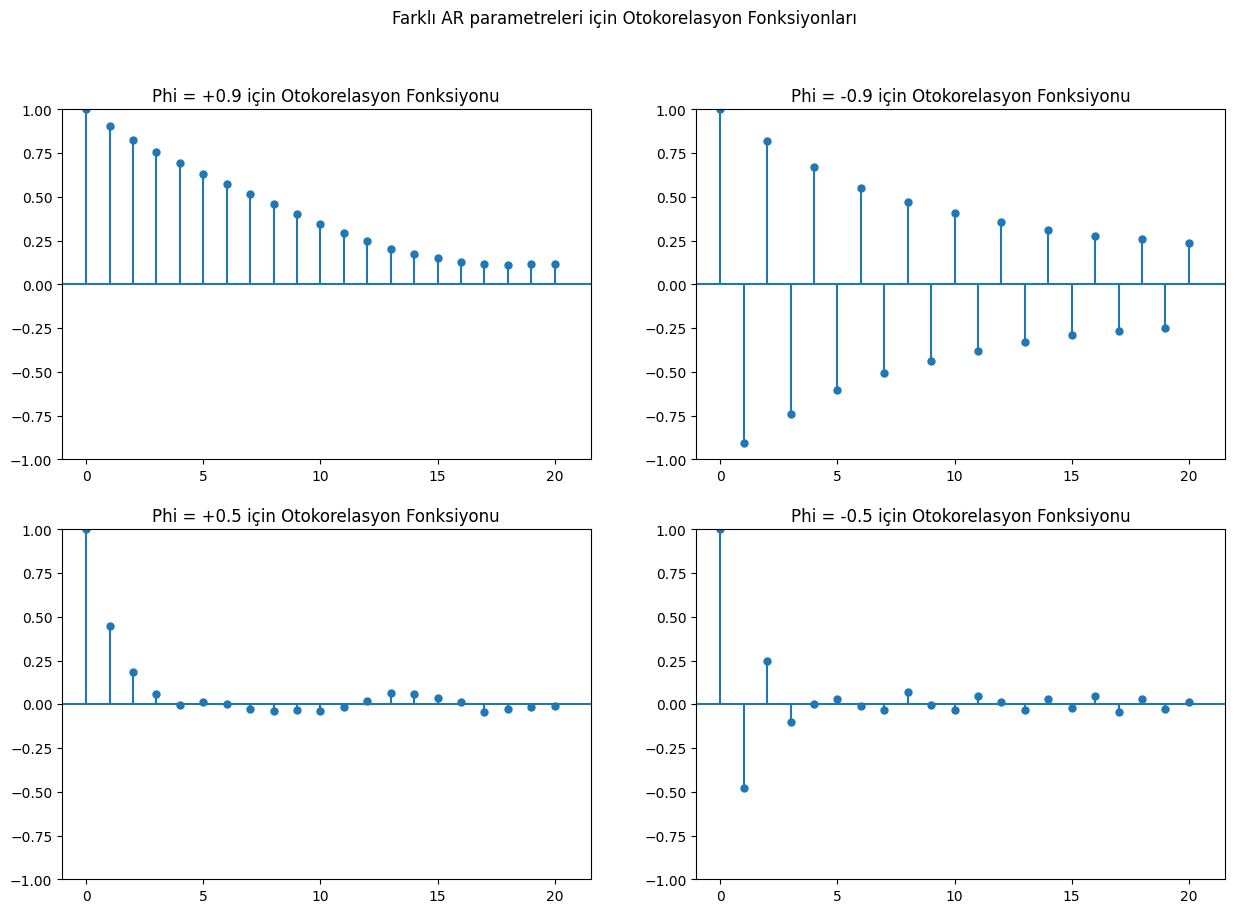

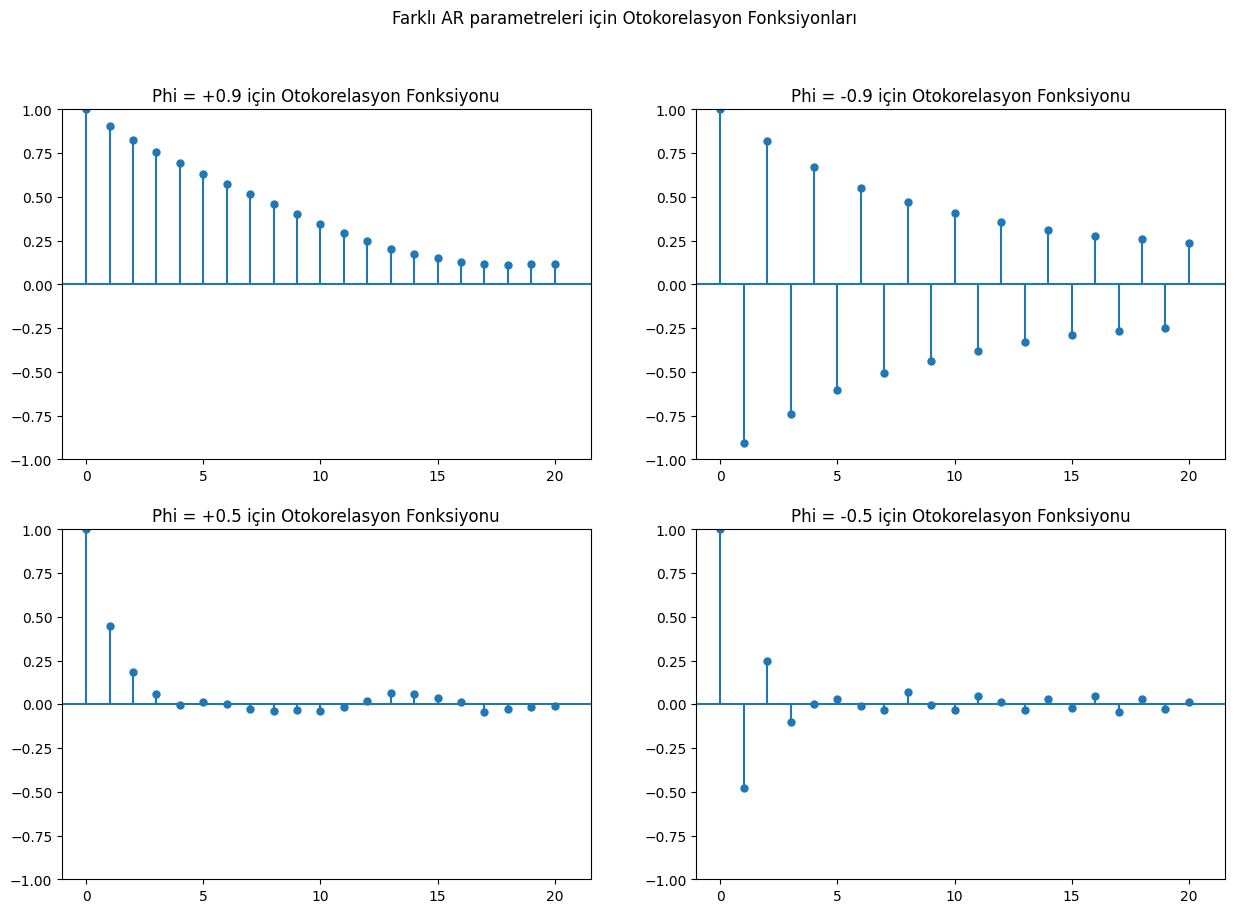

In [54]:
# statsmodels'den plot_acf modülünü içe aktar
from statsmodels.graphics.tsaplots import plot_acf

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Farklı AR parametreleri için Otokorelasyon Fonksiyonları')

# Plot 1: AR parametresi = +0.9
plot_acf(simulated_data_1, alpha=1, lags=20, ax=axs[0, 0], title='Phi = +0.9 için Otokorelasyon Fonksiyonu')

# Plot 2: AR parametresi = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20, ax=axs[0, 1], title='Phi = -0.9 için Otokorelasyon Fonksiyonu')

# Plot 3: AR parametresi = +0.5
plot_acf(simulated_data_3, alpha=1, lags=20, ax=axs[1, 0], title='Phi = +0.5 için Otokorelasyon Fonksiyonu')

# Plot 4: AR parametresi = -0.5
plot_acf(simulated_data_4, alpha=1, lags=20, ax=axs[1, 1], title='Phi = -0.5 için Otokorelasyon Fonksiyonu')


Eğer phi (φ) pozitifse, otokorelasyon fonksiyonu phi hızında üstel bir şekilde azalacaktır. Yani, eğer phi 0.9 ise, otokorelasyon 1'de 0.9, 2'de (0.9)2, 3'te (0.9)3, ve böyle devam eder. Eğer phi negatifse, aynı şey olacaktır ancak her lag'de işaretini tersine çevirecektir.

### AR Modellerinin Parametrelerini Tahmin Etme ve Tahminde Bulunma

Zaman serisi için AR modellerinin parametrelerini tahmin etmek için aşağıdaki örnekte gösterildiği gibi ARIMA sınıfını kullanabiliriz

In [55]:
from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(simulated_data_1, order=(1,0,0))
result = mod.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1440.726
Date:                Mon, 11 Dec 2023   AIC                           2887.452
Time:                        08:38:55   BIC                           2902.175
Sample:                             0   HQIC                          2893.047
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2058      0.339      0.607      0.544      -0.459       0.871
ar.L1          0.9047      0.014     62.962      0.000       0.877       0.933
sigma2         1.0427      0.046     22.510      0.0

Order (1,0,0), veriyi bir AR(1) modeline uyarlamak anlamına gelir. Bir order (2,0,0) ise veriyi bir AR(2) modeline uyarladığınız anlamına gelir. Order'ın ikinci ve üçüncü bölümleri bir sonraki bölümde tartışılacaktır.

Sonuçların özeti aşağıda gösterilmiştir. Görebildiğimiz kadarıyla, bu 0.91 değerine sahiptir ki bu, önceki bölümde kullanılan simüle edilmiş verinin phi parametresine benzer.

## Doğru Modelin Seçilmesi
Önceki alt bölümde modelin sırası zaten biliniyordu. Ancak pratikte, bu size verilmeyebilir. AR modelinin sırasını belirleme için farklı yöntemler vardır. İki tanesine odaklanacağız: Parçalı Otokorelasyon Fonksiyonu ve Bilgi Kriterleri.(Partial Autocorrelation Function ve Information Criteria)

Parçalı otokorelasyon fonksiyonu (PACF), başka bir gecikmenin eklenmesinin getirdiği artı değerleri ölçer. PACF'yi daha iyi anlamak için önce parçalı otokorelasyonu tanımlayalım. Parçalı otokorelasyon, bir zaman serisindeki bir gözlem ile aradaki ilişkiyi tanımlar ve aradaki gözlemlerin korelasyonlarını dikkate almaz. Ardışık zaman adımlarındaki gözlemler arasındaki korelasyon, dolaylı korelasyonların lineer bir fonksiyonudur. Bu dolaylı bağlantılar, parçalı otokorelasyon fonksiyonu kullanılarak ortadan kaldırılır.

Bu parçalı otokorelasyon tanımına dayanarak PACF, yalnızca bu gözlemler arasındaki kısa gecikmelerin açıklayamadığı iki veri arasındaki ilişkiyi gösterir. Örneğin, gecikme 3 için parçalı otokorelasyon, sadece gecikme 1 ve 2'nin açıklayamadığı korelasyondur. Diğer bir deyişle, her gecikme için parçalı korelasyon, orta korelasyonlar kaldırıldıktan sonra iki gözlem arasındaki benzersiz korelasyondur.


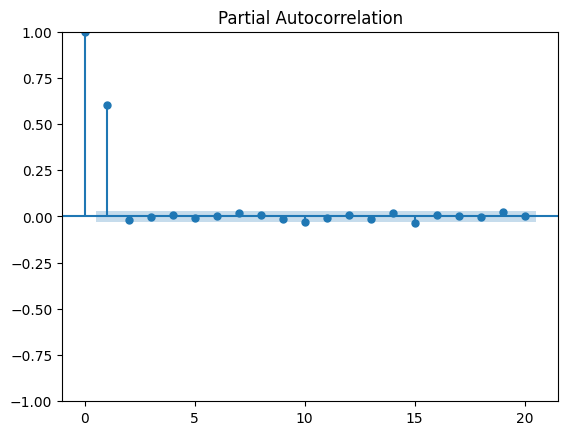

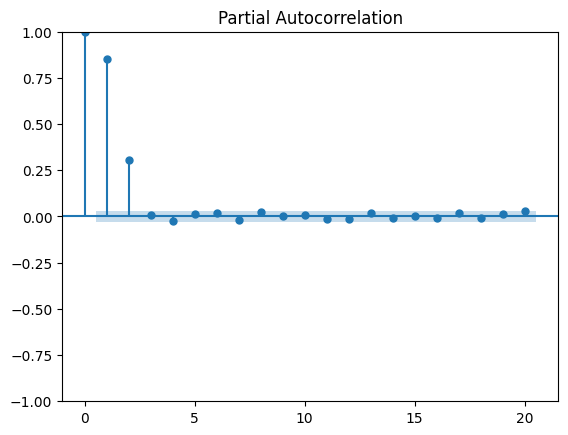

In [56]:
# Veri simülasyonu ve PACF çizimi için modülleri içe aktar
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf

# phi=+0.6 ile AR(1) simülasyonu yap
ma = np.array([1])
ar = np.array([1, -0.6])
AR_nesne_1 = ArmaProcess(ar, ma)
simule_edilen_veri_1 = AR_nesne_1.generate_sample(nsample=5000)

# AR(1) için PACF çizimi
plot_pacf(simule_edilen_veri_1, lags=20)
plt.show()

# phi1=+0.6, phi2=+0.3 ile AR(2) simülasyonu yap
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_nesne_2 = ArmaProcess(ar, ma)
simule_edilen_veri_2 = AR_nesne_2.generate_sample(nsample=5000)

# AR(2) için PACF çizimi
plot_pacf(simule_edilen_veri_2, lags=20)
plt.show()


Bu grafikler, farklı derecelerdeki AR modelleri için Kısmi Otokorelasyon Fonksiyonunu (PACF) gösterir. Üst grafikte, AR(1) modeli için sadece gecikme (1) PACF sıfırdan önemli ölçüde farklıdır. Benzer şekilde, AR(2) modeli için iki gecikme sıfırdan farklıdır.

Eğer önceki alt bölümde kullandığımız ARIMA fonksiyonunu, önceki örnekte kullanılan simüle edilmiş verilere uygular ve PACF grafiğinden elde ettiğimiz model sırasını kullanırsak, fonksiyondan simüle edilen verileri oluşturmak için kullanılan parametreleri elde etmeliyiz. Aşağıdaki örnekte AR(2) ve phi değerleri 0.6 ve 0.3 olan simüle edilmiş verileri kullandık:

In [57]:
mod = ARIMA(simule_edilen_veri_2, order=(2,0,0))
result = mod.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5000
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -7048.087
Date:                Mon, 11 Dec 2023   AIC                          14104.173
Time:                        08:39:01   BIC                          14130.242
Sample:                             0   HQIC                         14113.310
                               - 5000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0122      0.137     -0.089      0.929      -0.281       0.257
ar.L1          0.5927      0.014     43.828      0.000       0.566       0.619
ar.L2          0.3052      0.014     22.599      0.0

Bir modeldeki parametre sayısı ne kadar fazlaysa, modelin verilere ne kadar iyi uyum sağlayacağı o kadar artar. Ancak bu durum, modelin verilere aşırı uyum sağlamasına yol açabilir. Bilgi kriterleri, kullanılan parametre sayısına dayalı olarak bir ceza uygulayarak bir modelin uygunluğunu ayarlar. İki yaygın ayarlanmış uygunluk ölçüsü, Akaike Bilgi Kriteri (AIC) ve Bayesian Bilgi Kriteri (BIC) olarak adlandırılır.

AIC, bir modelin hangi derecede verilere uyduğunu değerlendirmek için matematiksel bir yöntemdir. İstatistikte, AIC, farklı olası modelleri karşılaştırmak ve hangi modelin verilere en iyi uyduğunu belirlemek için kullanılır. AIC'ye göre en iyi uygun model, mümkün olan en az bağımsız değişkeni kullanarak en büyük varyasyonu açıklayan modeldir. BIC, bir dizi model arasında model seçimi için bir ölçüdür. Kısmen olasılık fonksiyonuna dayanır ve AIC ile yakından ilişkilidir. Modelleri uyumlaştırırken, parametre ekleyerek olasılığı artırmak mümkündür, ancak bu overfittinge neden olabilir. BIC, bu sorunu modeldeki parametre sayısı için bir ceza terimi tanıtarak çözer. Ceza terimi, BIC'de AIC'den daha büyüktür.

Uygulamada, bilgi kriterlerini kullanmanın yolu, farklı parametre sayısına sahip birkaç modeli uydurmak ve en düşük Bayesian bilgi kriterine sahip olanı seçmektir. Bu, aşağıdaki örnekte gösterilmiştir

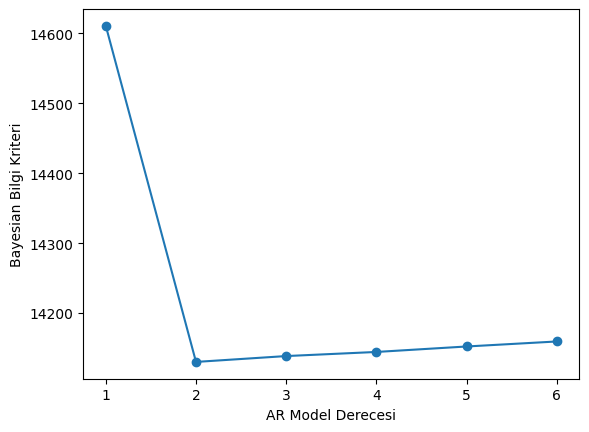

In [64]:
# ARMA modelini tahmin etmek için gerekli modülü içe aktar
from statsmodels.tsa.arima.model import ARIMA

# AR(p) için p = 0,...,6 olacak şekilde veriyi uydur ve BIC'yi kaydet
BIC = np.zeros(7)
for p in range(7):
    mod = ARIMA(simule_edilen_veri_2, order=(p, 0, 0))
    res = mod.fit()
    # AR(p) için BIC'yi kaydet
    BIC[p] = res.bic
    
# BIC'yi p fonksiyonu olarak çiz
plt.plot(range(1, 7), BIC[1:7], marker='o')
plt.xlabel('AR Model Derecesi')
plt.ylabel('Bayesian Bilgi Kriteri')
plt.show()


## Moving Average ve ARMA Modelleri

Bu bölümde, başka bir tür model olan hareketli ortalama veya MA modelini inceleyeceğiz. Ayrıca, AR ve MA modellerini birleştirerek güçlü bir ARMA modeli oluşturmayı da göreceğiz


MA modelinde, bugünkü değerler bir ortalama artı gürültü, artı önceki günün gürültüsünün theta kadar bir kısmıyla eşittir. Bu, aşağıdaki denklemde gösterilmiştir:

R(t) = Ortalama + gürültü + theta * (dün-gürültü)

Bu, bir MA modelidir ve sadece dünkü gürültüyü dikkate aldığımız için MA(1) modeli olarak adlandırılır. Eğer iki önceki günü de düşünüyorsak bu MA(2) olur, ve böyle devam eder. MA parametresi, theta, sıfır ise, süreç beyaz gürültüdür. MA modelleri, theta'nın tüm değerleri için durağandır.

Varsayalım ki R(t), hisse senedi getirilerinin bir zaman serisidir. Eğer theta negatifse, o zaman bir önceki periyottaki pozitif bir şok, epsilon(t-1) tarafından temsil edilen, geçen periyodun getirisinin pozitif olmasına neden olmuş olabilir, ancak bu periyodun getirisinin daha olası negatif olacaktır. İki periyot önceki bir şokun bugünkü getiri üzerinde herhangi bir etkisi olmayacaktır, sadece şu anki ve geçen periyodun şoku etkilidir.

MA modelinden simüle edilmiş veri oluşturmak için aşağıdaki örnekte gösterildiği gibi statsmodels kütüphanesinden ArmaProcess'i kullanabiliriz:


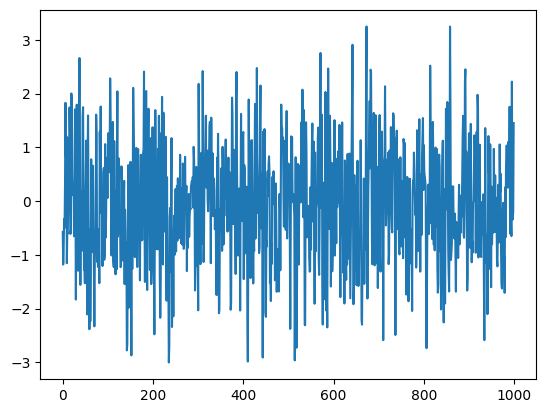

In [65]:
from statsmodels.tsa.arima_process import ArmaProcess
ar = np.array([1])
ma = np.array([1, 0.5])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=1000)
plt.plot(simulated_data)

### MA modellerini tahmin etme

Verilen zaman serisinden MA modelini tahmin etmek için, önceki bölümde gösterilen AR modelini tahmin etme yöntemini kullanabiliriz. ARIMA fonksiyonunu kullanacağız, ancak sırası (1,0,0) yerine (0,0,1) olacak. Bu konuyu aşağıdaki örnekte görebilirsiniz:


In [60]:
from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(simulated_data, order=(0,0,1))
result = mod.fit()
print(result.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1441.052
Date:                Mon, 11 Dec 2023   AIC                           2888.105
Time:                        08:39:10   BIC                           2902.828
Sample:                             0   HQIC                          2893.701
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0442      0.049      0.909      0.363      -0.051       0.140
ma.L1          0.4981      0.028     18.016      0.000       0.444       0.552
sigma2         1.0449      0.051     20.559      0.0

Sonuç, simülasyon verilerini oluşturmak için kullanılan parametre 0 olduğu için beklentimizle uyumludur

## ARMA modeli
ARMA modeli, hem AR (AutoRegressive - Otoregresif) hem de MA (Moving Average - Hareketli Ortalama) modellerinin bir kombinasyonudur. İşte ARMA(1,1) modelinin formülü:

R(t) = Ortalama + theta * Gürültü(t-1) + phi * R(t-1) + Gürültü(t)

## Durum Çalışması 

Bu dökümanda kapsanan tüm konseptleri, iklim değişikliği case study örneği üzerinden bir araya getirelim. Yaklaşık 150 yıl boyunca alınan bazı sıcaklık verilerini analiz edeceğiz. Veri, NOAA web sitesinden indirilmiştir.

Aşağıdaki adımlar atılacak:
Pandas yöntemlerini uygulayarak endeksi DateTime'a dönüştürme ve veriyi çizme.

Verinin Rassal Yürüyüş olup olmadığını görmek için Augmented Dickey-Fuller testini uygulama.

Verideki ilk farkları alarak, veriyi durağan bir seriye dönüştürme.

Verinin Otokorelasyon Fonksiyonunu ve Kısmi Otokorelasyon Fonksiyonunu hesaplama.

Veri üzerine AR, MA ve ARMA modellerini uydurma.

İncelediğiniz modeller arasında en iyi modeli seçmek için Bilgi Kriterini kullanma.

Son olarak, en iyi model ile önümüzdeki 30 yıl boyunca sıcaklıkları tahmin etme.

İlk iki adım, aşağıdaki kod ile yapılmıştır:

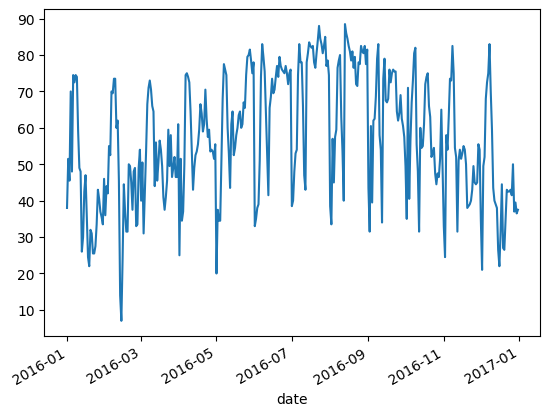

ADF testi için p-değeri:  0.722327397186241


In [61]:
# statsmodels modülünden adfuller fonksiyonunu içe aktar
from statsmodels.tsa.stattools import adfuller

# Veriyi yükle
temp_NY = pd.read_csv('Datasets/EDA/weather_data_nyc_centralpark_2016(1).csv', parse_dates=['date'], index_col='date')

# İndex'i bir datetime nesnesine dönüştür
temp_NY.index = pd.to_datetime(temp_NY.index, format='mixed')

# Ortalama sıcaklıkları çiz
temp_NY['average temperature'].plot()
plt.show()

# ADF p-değerini hesapla ve yazdır
result = adfuller(temp_NY['average temperature'])
print("ADF testi için p-değeri: ", result[1])


ADF testinin p değeri 0.72'dir, bu da zaman serisinin durağan olmadığı ve bunun rastgele bir yürüyüş olmadığını reddedemeyeceğimiz anlamına gelir.

Üçüncü ve dördüncü adımlar, aşağıdaki kod kullanılarak veri üzerine uygulanır:


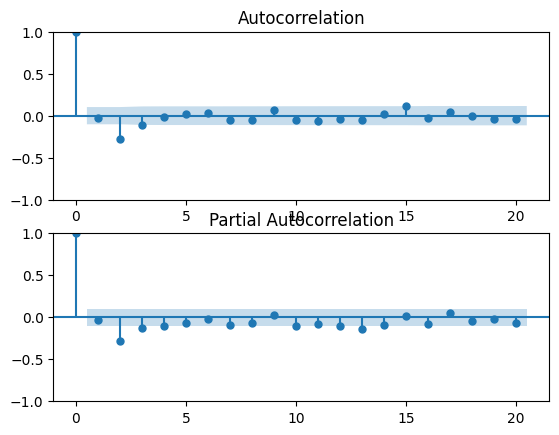

In [62]:
# ACF ve PACF örneklerini çizmek için modülleri içe aktar
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Sıcaklık Serisinin ilk farkını al
chg_temp = temp_NY['average temperature'].diff()
chg_temp = chg_temp.dropna()

# Aynı sayfada ACF ve PACF'yi çiz
fig, axes = plt.subplots(2, 1)

# ACF'yi çiz
plot_acf(chg_temp, lags=20, ax=axes[0])

# PACF'yi çiz
plot_pacf(chg_temp, lags=20, ax=axes[1])
plt.show()


AFC ve PACF'de negatif gecikmeli-1 otokorelasyon dışında belirgin bir desen yok.

Bundan sonra, veriye üç model uydurulacak ve her model için AIC hesaplanacaktır. Bu, aşağıdaki kod kullanılarak gerçekleştirilir:

In [63]:
# ARIMA modelini tahmin etmek için modülü içe aktar
from statsmodels.tsa.arima.model import ARIMA

# Veriyi AR(1) modeline uyumlu hale getirin ve AIC'yi yazdırın:
mod_ar1 = ARIMA(chg_temp, order=(1, 0, 0))
res_ar1 = mod_ar1.fit()
print("AR(1) için AIC: ", res_ar1.aic)

# Veriyi AR(2) modeline uyumlu hale getirin ve AIC'yi yazdırın:
mod_ar2 = ARIMA(chg_temp, order=(2, 0, 0))
res_ar2 = mod_ar2.fit()
print("AR(2) için AIC: ", res_ar2.aic)

# Veriyi ARMA(1,1) modeline uyumlu hale getirin ve AIC'yi yazdırın:
mod_arma11 = ARIMA(chg_temp, order=(1, 0, 1))
res_arma11 = mod_arma11.fit()
print("ARMA(1,1) için AIC: ", res_arma11.aic)


AR(1) için AIC:  2358.918557229653
AR(2) için AIC:  2331.9914146253486
ARMA(1,1) için AIC:  2323.4757201375196


/workspace/timeseriesanalysandforecasting0712_1112_23/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspace/timeseriesanalysandforecasting0712_1112_23/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspace/timeseriesanalysandforecasting0712_1112_23/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspace/timeseriesanalysandforecasting0712_1112_23/env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueW

ARMA(1,1) modeli, üç model arasında en düşük AIC değerlerine sahiptir. Bu nedenle, parametre tahmini ve tahminleme için kullanılacaktır.